In [135]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

execfile('/home/xiaodongli/software/pythonlib/stdA.py')
execfile('/home/xiaodongli/software/pythonlib/bossdatamock.py')
execfile('/home/xiaodongli/software/pythonlib/Tpcftools_smuximu.py')


def meannorm(Y):
    return Y / mean(Y)

def packarray(A, rat):
    As = [A[row::rat] for row in range(rat)]
    #print As
    nowlen =  min([len(X) for X in As])
    B = As[0][:nowlen]
    
    for row in range(1,len(As)):
        B = B + As[row][:nowlen]
    return B
def packarray2d(A, rat):
    As = [A[:,row::rat] for row in range(rat)]
    #print As
    nowlen =  min([len(X[0]) for X in As])
    B = As[0][:,:nowlen]
    
    for row in range(1,len(As)):
        B = B + As[row][:,:nowlen]
    return B
bigmd_redata = np.loadtxt('/home/xiaodongli/data/BigMDPL/Redshifts.csv', delimiter=',')
bigmd_reds = {}
for row in range(len(bigmd_redata)):
    bigmd_reds[int(bigmd_redata[row,0])] = (bigmd_redata[row,3])

Populating the interactive namespace from numpy and matplotlib


In [136]:
def calc_intximu(filename, s_min = 6, s_max = 40, mumax = 0.97, 
                numsbin=150, nummubin=120, mubin_pack_rat = None, 
                omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -1.0, z= 0.0):
    data = np.loadtxt(filename)
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    DD, DR, RR = [data[:,row].reshape(150,120) for row in [3,4,6]]
    DD /= norms[0]; DR /= norms[1]; RR /= norms[2]
    
    if omstd == omnew and wstd == wnew:
        pass
    else:
        DAstd, DAnew = DA(omstd, wstd, 0.6777, z), DA(omnew, wnew, 0.6777, z)
        Hstd, Hnew = Hz(omstd, wstd, 0.6777, z), Hz(omnew, wnew, 0.6777, z)
        DD2, DR2, RR2  = [ mapping_smudata_to_another_cosmology_simple(X, DAstd, DAnew, Hstd, Hnew, ) for X in [DD,DR,RR]]
        DD, DR, RR = DD2, DR2, RR2
    
    imumax = int(nummubin*mumax)
    DD, DR, RR = DD[:,:imumax], DR[:,:imumax], RR[:,:imumax]
    if mubin_pack_rat == None:
        pass
    else:
        DD, DR, RR = packarray2d(DD, mubin_pack_rat), packarray2d(DR, mubin_pack_rat), packarray2d(RR, mubin_pack_rat)
    xi = np.divide(DD-2*DR+RR,RR)
    return xi[s_min:s_max+1,:].sum(0)

In [203]:
###def average
#for nowid, snpid in [[0, 7],[1,8],[2,9],[3,10],[4,11],[5,12],[6,15],\
#                     [7,26],[8,33],[9,41],[10,48],[11,58],[12,75],[13,79]]:
    outputfile = '../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_rands00_snap%02i'%snpid+\
   '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'

# names of the 30 files
    files = ['../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos%02i'%num+'%s'%chr(97+nowid)+\
   '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf' for num in range(1,31)]

# average 
    outputf = open(outputfile, 'w')
   
    DD_ave = np.zeros(18000).reshape(-1, 1); DR_ave = np.zeros(18000).reshape(-1, 1); 
    
    norms_ave = np.zeros((3)); xi_ave = np.zeros(18000).reshape(-1, 1)
    
    for nowfile in files:
        data = np.loadtxt(nowfile)
        norms = np.array([float(xx) for xx in open(nowfile, 'r').readline().split()[1:4]])
        xi, DD, DR = [data[:,row].reshape(-1, 1) for row in [2,3,4]]
        DD_ave += DD/30; DR_ave += DR/30; RD_ave = DR_ave; norms_ave += norms/30; xi_ave += xi/30  
    
    mu, s, RR = [data[:,row].reshape(-1, 1) for row in [0,1,6]]    
    #DD_ave /= norms_ave[0]; DR_ave /= norms_ave[1]; RR /= norms_ave[2] 
    arr = np.hstack((mu,s,xi,DD_ave,DR_ave,DR_ave,RR))
    bins=len(arr)
    normstr = ''
    normfactors='#norms_ave_factors: '
    for val in norms_ave: normstr += (str(val)+' ')
    outputf.write(normfactors+normstr+'\n')
    for i in range(bins):
        X = arr[i,:]
        nowstr = ''
        for val in X: nowstr += (str(val)+' ')
        outputf.write(nowstr+'\n')
    #np.savetxt('cola_BigMD_rockstar_halos_snap%02i'%snpid+\
            #'.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf',arr) 
    print 'Processing', outputfile, '...'
    outputf.close()

Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_rands00_snap07.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_rands00_snap08.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_rands00_snap09.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_rands00_snap10.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_rands00_snap11.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_rands00_snap12.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ..

In [206]:
def drawximu(nowid=None, filename=None, fig=None, ax1=None, ax2=None, ax3=None, ax4=None,\
             ax5=None, ax6=None, mubin_pack_rat = 1, mumax=0.97, color=None,
            omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -1.0, z=0.0, zsma=0.0,
            only_plot_nbody=False):
    
    numsbin=150; nummubin=120;
    
    s_min=6; s_max=40
    
    c = '%s'%chr(color)
    cita_to_bigmd_snapid = {15:79, 14: 75, 13:58, 12:48, 11:41,10:33, 9:26, 8:15, 7:12, 6:11, 5:10}
    if fig == None:
        fig, [[ax1, ax3, ax5], [ax2, ax4, ax6]] = plt.subplots(2, 3, figsize=(24,12))
        
    if filename == None:
        filename_bigmd = '/home/xiaodongli/projects/cf_pks/BigMD_2pcfs/snaps/'+str(cita_to_bigmd_snapid[snpid])+\
        '_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_cola = '../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_rands00_snap%02i'%cita_to_bigmd_snapid[snpid]+\
        '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_bigmd_sma = '/home/xiaodongli/projects/cf_pks/BigMD_2pcfs/snaps/'+str(cita_to_bigmd_snapid[snpid+1])+\
        '_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_cola_sma = '../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_rands00_snap%02i'%cita_to_bigmd_snapid[snpid+1]+\
        '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
    
    filename_bigmd_79 = '/home/xiaodongli/projects/cf_pks/BigMD_2pcfs/snaps/'+str(cita_to_bigmd_snapid[15])+\
        '_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
    filename_cola_79 = '../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_rands00_snap79'\
        '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'

    filenames = [filename_bigmd, filename_bigmd_sma, filename_cola, filename_cola_sma, filename_bigmd_79, filename_cola_79]

#    intximu_cita, intximu_cita_sma, intximu_cola, intximu_cola_sma, intximu_cita_14, intximu_cola_14 = \
    zs = [z,zsma, z, zsma, 0.1, 0.1]
    #print zs
    intximus = [calc_intximu(filenames[row], s_min = s_min, s_max = s_max, mumax = mumax, mubin_pack_rat=mubin_pack_rat,
                            omstd=omstd, wstd=wstd, omnew=omnew, wnew = wnew, z=zs[row])
                    for row in range(len(filenames))]
    
    imumax = int(nummubin*mumax)
    Y_bigmd, Y_bigmd_sma, Y_cola, Y_cola_sma, Y_bigmd_79, Y_cola_79 = [meannorm(intximu) for intximu in intximus]
    mu = np.loadtxt(filenames[0])[:,0]; X = np.ones(nummubin) - mu[:nummubin]; X = X[:imumax]; 
    X = np.divide(packarray(X, mubin_pack_rat), float(mubin_pack_rat))

    
    error=list(map(lambda x: x[0]-x[1], zip(Y_cola,Y_bigmd)))
    #cita_dxidz = list(array(list(map(lambda x: x[0]-x[1], zip(Y_cita,Y_cita_sma))))/0.1)
    #cola_dxidz = list(array(list(map(lambda x: x[0]-x[1], zip(Y_cola,Y_cola_sma))))/0.1)
    bigmd_dxidz = array(list(map(lambda x: x[0]-x[1], zip(Y_bigmd,Y_bigmd_sma))))/0.1
    cola_dxidz = array(list(map(lambda x: x[0]-x[1], zip(Y_cola,Y_cola_sma))))/0.1
    
    # X, Y for plot
    ax1.plot(X,Y_bigmd, color = c,label='bigmd'+' z= '+str((15-snpid)*0.1))
    ax1.plot(X,Y_cola, color = c,linestyle=':',label='cola'+' z= '+str((15-snpid)*0.1))
    #ax1.plot(X,intximu_cita[:imumax], label='cita'+' z= '+str((15-nowid)*0.1))
    #ax1.plot(X,intximu_cola[:imumax], linestyle='dashed',label='cola'+' z= '+str((15-nowid)*0.1))
    ax1.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=20)
        

    label_err='cola-bigmd'+' z= '+str((15-snpid)*0.1)
    nowfit = polyfit(X,error,1)
    Y = polyval(nowfit,X)
    ax2.plot(X,error, color = c, label = label_err)
    ax2.plot(X,Y, ls='--', color = c,label = '1or cola-bigmd'+' z= '+str((15-nowid)*0.1))
    ax2.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$(cola-bigmd)',fontsize=20)
        
    
    label_z='z= '+str((15-nowid)*0.1)+'- z = 0.1'
    ax3.plot(X, Y_bigmd-Y_bigmd_79, color = c, label = 'bigmd ' +label_z)
    ax3.plot(X, Y_cola-Y_cola_79, color = c, ls=':', label = 'cola ' + label_z)
    ax3.set_ylabel(r'$\hat \xi_{\Delta s}(\mu) - \hat \xi_{\Delta s}(\mu, z=0.1)$', fontsize=20)
        
 
    label_h='z= '+str((15-snpid)*0.1)+'- z = 0.1'
    ax4.plot(X,(Y_cola-Y_cola_79)-(Y_bigmd-Y_bigmd_79), color = c, label = label_h)
    ax4.set_ylabel(r'$\xi_{\Delta s}(\mu,z)$(cola-cita)', fontsize=20)
        

    label_ci=' z = '+str((15-snpid)*0.1)+'-'+'z = '+str((14-snpid)*0.1)
    ax5.plot(X,bigmd_dxidz, color = c, label = 'bigmd '+label_ci)
    ax5.plot(X,cola_dxidz, color = c, ls=':',label = 'cola '+ label_ci)
    ax5.set_ylabel(r'$d\xi_{\Delta s}(\mu)/dz$',fontsize=20)
        
    ax6.plot(X,cola_dxidz-bigmd_dxidz, color = c, label = 'cola-bigmd '+ label_ci)
    #ax6.plot(X,np.array(cola_dxidz)-np.array(cita_dxidz))
    ax6.set_ylabel(r'$d\xi_{\Delta s}(\mu)/dz$(cola-bigmd)',fontsize=20)
   
    
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.grid(ls='--') 
        ax.set_xlabel('$1-\mu$', fontsize=18) 
        ax.legend(fontsize=14, frameon=False)
    return fig, ax1, ax2, ax3, ax4, ax5, ax6, z

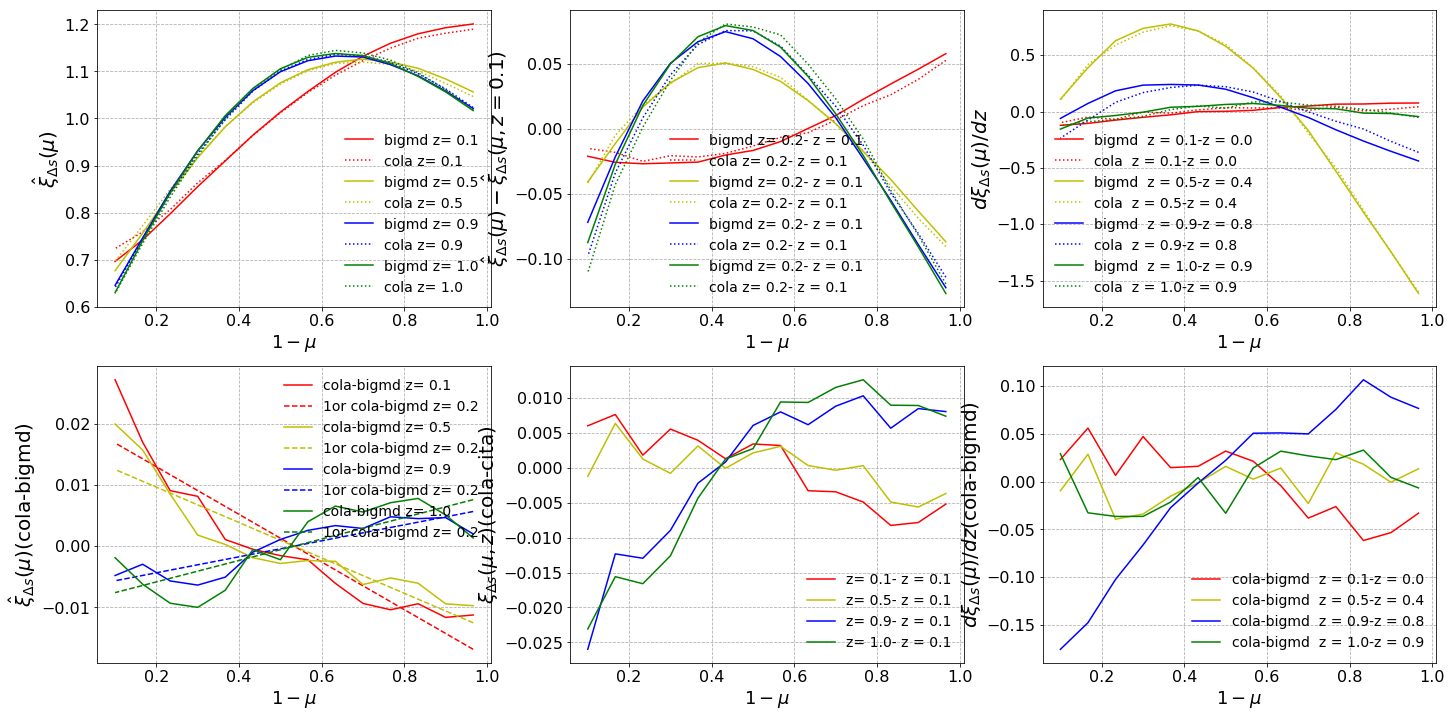

In [209]:
filename =fig = ax1 = ax2 = ax3 = ax4 = ax5 = ax6 = None
zsma = 0.0001
for snpid,color,z in [[14,114,0.0001],[10,121,0.5],[6,98,1.0],[5,103,1.5]]:
#for nowid in [14,10,5,0]:
    fig, ax1, ax2, ax3, ax4, ax5, ax6, zsma=drawximu(nowid, filename, fig, ax1, ax2, ax3, ax4, ax5, ax6,
                                               mubin_pack_rat=8, mumax=0.97,color=color,
                                                      omstd=0.3071, wstd=-1.0, omnew=1, wnew = -1, z=z,zsma=zsma)
                                              # omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -2.5, z=z,zsma=zsma)
                                               #omstd=0.3071, wstd=-1.0, omnew=0.3070, wnew = -1.0, z=0.1)

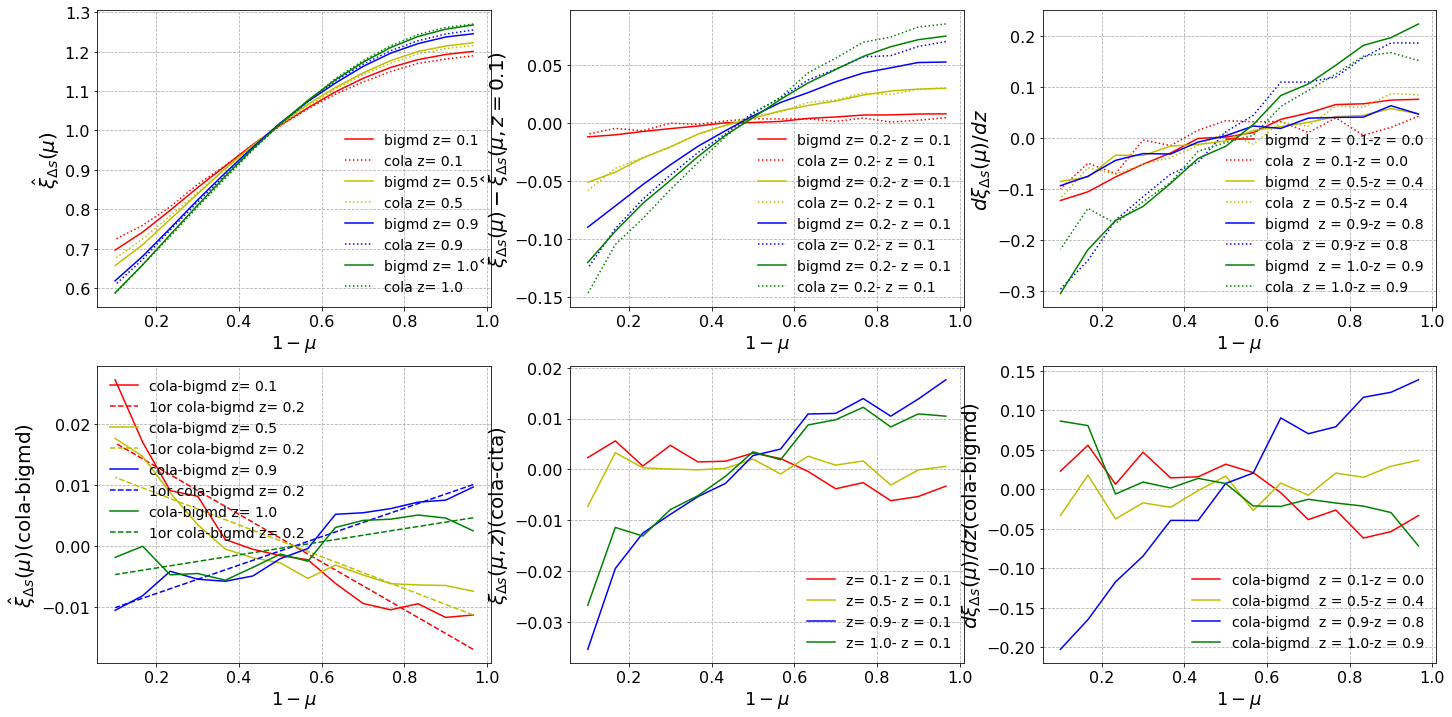

In [157]:
filename =fig = ax1 = ax2 = ax3 = ax4 = ax5 = ax6 = None
zsma = 0.1
for snpid,color,z in [[14,114,0.],[10,121,0.5],[6,98,1.0],[5,103,1.5]]:
#for nowid in [14,10,5,0]:
    fig, ax1, ax2, ax3, ax4, ax5, ax6, zsma=drawximu(nowid, filename, fig, ax1, ax2, ax3, ax4, ax5, ax6,
                                               mubin_pack_rat=8, mumax=0.97,color=color)